<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [50]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [75]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
x, y = generate_linear()

Generating 'Linearly-separated' data set


In [85]:
model = SVC()
param_grid = [
    {'C': [0.1,1,10,100,1000,10000], 'kernel': ['linear', 'poly'], 'degree': [2,3], 'gamma': ['auto']},
    {'C': [0.1,1,10,100,1000,10000], 'kernel': ['rbf'], 'degree': [2,3]}
]
cv = KFold(n_splits=10, shuffle=True, random_state=123)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv.get_n_splits(x,y), n_jobs=-1, verbose=1)

grid.fit(x, y)
grid.best_score_, grid.best_estimator_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.1s finished


(0.9, SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [82]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    kernel = 'linear'

    model = SVC(kernel=kernel)
    print "Trying model {}".format(model)
    
    accuracy = np.mean(cross_val_score(model, x, y))

    best_model = model
    best_accuracy = accuracy
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [83]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.0s finished


Plotting data set points
Plotting decision region


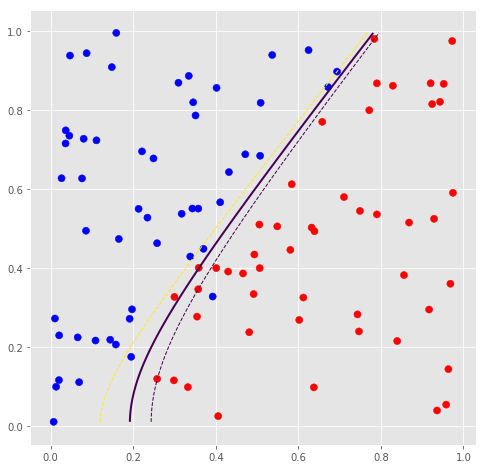

In [90]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
# clf = select_model(x, y)

model = SVC()
param_grid = [
    {'C': [0.1,1,10,100,1000,10000], 'kernel': ['linear', 'poly'], 'degree': [2,3], 'gamma': ['auto']},
    {'C': [0.1,1,10,100,1000,10000], 'kernel': ['rbf'], 'degree': [2,3]}
]
cv = KFold(n_splits=10, shuffle=True, random_state=123)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv.get_n_splits(x,y), n_jobs=-1, verbose=1)

grid.fit(x, y)
clf = grid.best_estimator_

plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.589461
Plotting data set points
Plotting decision region


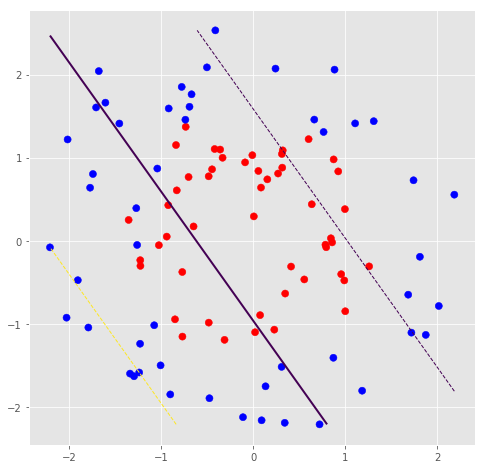

In [57]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.695161
Plotting data set points
Plotting decision region


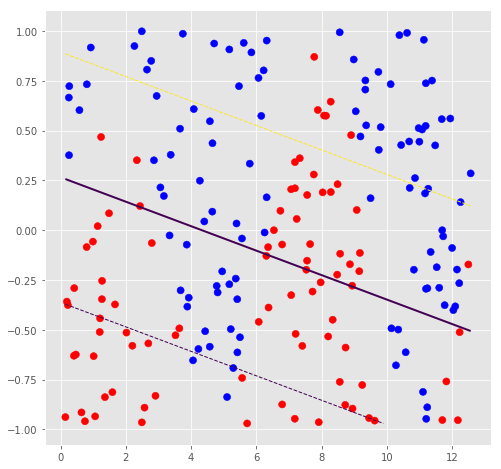

In [58]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('data/titanium.csv')
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


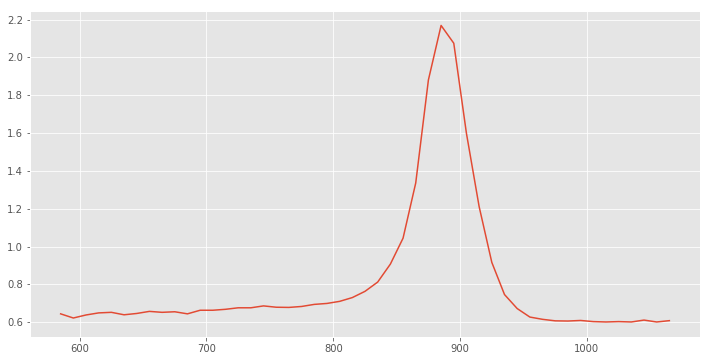

In [3]:
plt.plot(df.x, df.y)

In [4]:
X = df.x.values.reshape(-1,1)
X = (X - X.mean())/X.std()
y = df.y.values
Y = df.y.values

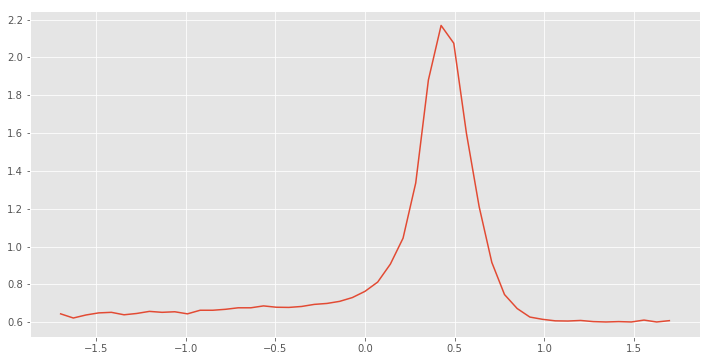

In [5]:
plt.plot(X, Y)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [6]:
from sklearn.metrics import mean_absolute_error

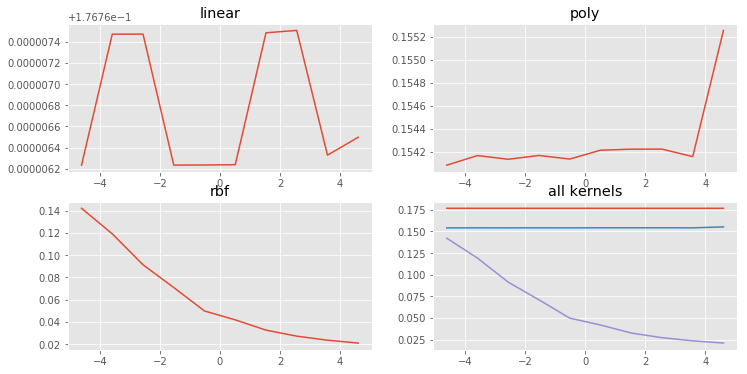

In [7]:
## Your Code Here

kernels = ['linear', 'poly', 'rbf']
kernel_params = {
    'linear': {},
    'poly': {'degree': 3, 'gamma': 6, 'coef0': 1},
    'rbf': {'gamma': 6, 'coef0': 1},
}
Cs = np.logspace(-2, 2, 10)
errors = dict()
best_models = dict()

for kernel in kernels:
    errors[kernel] = []
    min_error = -1
    for C in Cs:
        model = SVR(kernel=kernel, C=C, epsilon=0.01, **kernel_params[kernel])
        model.fit(X, Y)
        error = mean_absolute_error(Y, model.predict(X))
        if min_error == -1 or error < min_error:
            min_error = error
            best_models[kernel] = model
        errors[kernel].append(error)
        
        
_, errplots = plt.subplots(2, 2)
errplots[1, 1].set_title('all kernels')

for i, kernel in enumerate(kernels):
    errplot = errplots[i // 2, i % 2]
    errplot.set_title(kernel)
    errplot.plot(np.log(Cs), errors[kernel])
    errplots[1, 1].plot(np.log(Cs), errors[kernel])



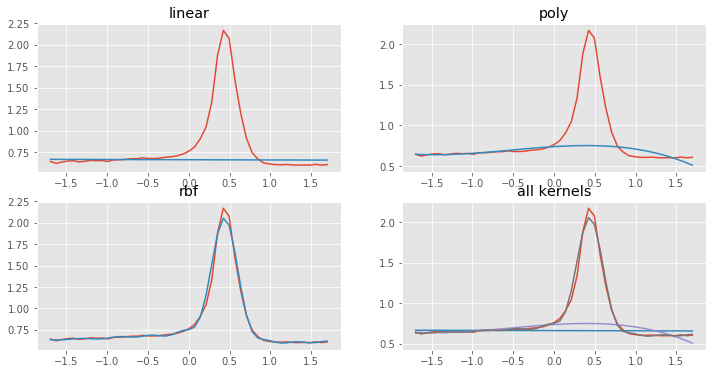

In [8]:
# for y in (Y, model.predict(X)):
#     plt.plot(X, y)
_, errplots = plt.subplots(2, 2)
errplots[1, 1].set_title('all kernels')
errplots[1, 1].plot(X, Y)

for i, kernel in enumerate(kernels):
    errplot = errplots[i // 2, i % 2]
    errplot.set_title(kernel)
    errplot.plot(X, Y)
    errplot.plot(X, best_models[kernel].predict(X))
    errplots[1, 1].plot(X, best_models[kernel].predict(X))


# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [9]:
## Your Code Here

In [10]:
# like this
df = pd.read_csv('data/war_and_peace_en.txt',header=None)
df['label'] = 0
# df.head()
df2 = pd.read_csv('data/war_and_peace_es.txt',header=None)
df2['label'] = 1
# df.head()
df3 = pd.concat((df,df2), ignore_index=True)
df3 = df3.rename(columns={0: 'word'})
df3

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0
5,book,0
6,one,0
7,chapter,0
8,well,0
9,prince,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
RND_SEED = 111

In [13]:
data = df3.sample(frac=1, random_state=RND_SEED).reset_index().drop(columns=['index'])[:1001]
data.head()

,word,label
0,inviting,0
1,years,0
2,that,0
3,avvezza,1
4,piacere,1


In [14]:
y = data.iloc[:,-1].as_matrix()
X = np.array(data.index)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [18]:
from Levenshtein import distance as ld
from itertools import product
def string_kernel(U, V):
    #Your Code Here
    sigma = 2.0
    distances = np.empty([U.shape[0], V.shape[0]])
    for i, j in product(xrange(U.shape[0]), xrange(V.shape[0])):
        distances[i, j] = ld(data.loc[U[i], 'word'], data.loc[V[j], 'word'])
        
    return np.exp(-distances**2 / float(2 * (sigma**2)))

In [19]:
G = string_kernel(X_train, X_train)

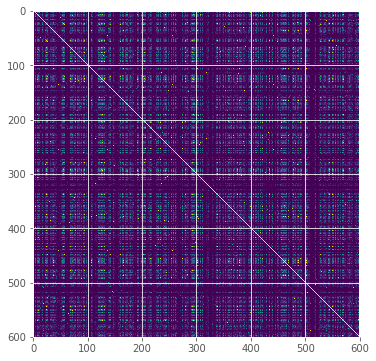

In [20]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
# Your Code Here
c_count = 10
cs = np.logspace(-2, 2, c_count)

accs = {
    'train': np.empty(c_count),
    'test': np.empty(c_count),
}

G_train = G
G_test = string_kernel(X_test, X_train)


In [23]:
for i, c in enumerate(cs):
    model = SVC(C=c, kernel='precomputed')
    model.fit(G_train, y_train)
    accs['train'][i] = accuracy_score(y_train, model.predict(G_train))
    accs['test'][i] = accuracy_score(y_test, model.predict(G_test))

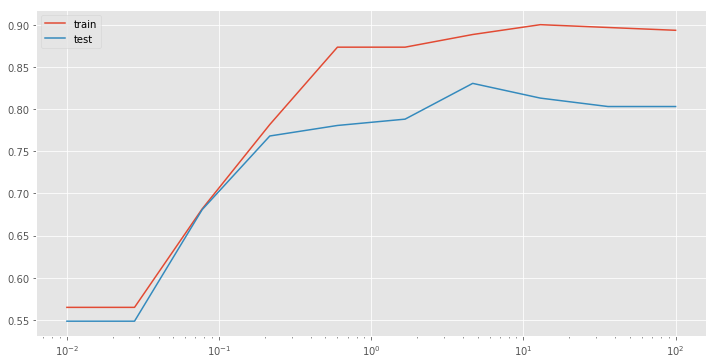

In [25]:
plt.plot(cs, accs['train'], label='train')
plt.plot(cs, accs['test'], label='test')
plt.xscale('log')
plt.legend()